<h1>Airline Passenger Satisfaction</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Read the Data</h3>

In [4]:
data = pd.read_csv("airline_passenger_satisfaction.csv")
data.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
data.shape

(129880, 24)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

<h2>EDA: </H2>

<h4>Show the count of satisfied and unsatisfied persons:</h4>

<AxesSubplot:xlabel='Satisfaction', ylabel='Count'>

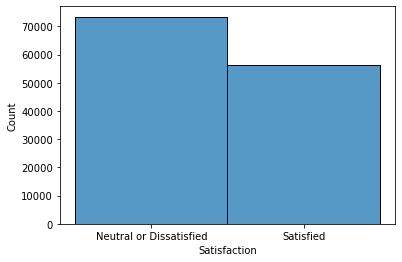

In [5]:
sns.histplot(data.Satisfaction)

<h3>Comapre the count of satisfied persons based on different features:</h3>

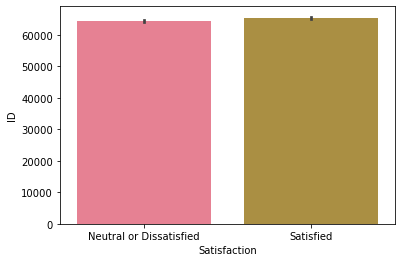

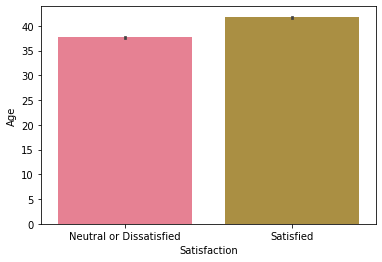

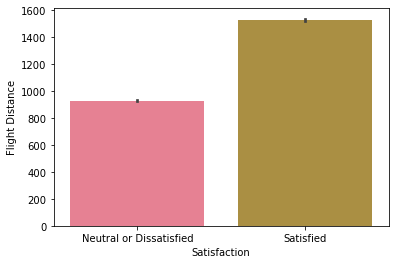

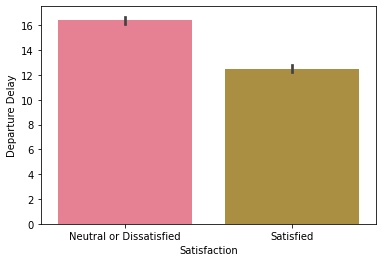

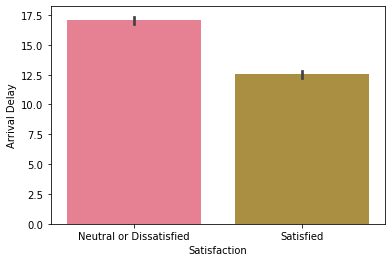

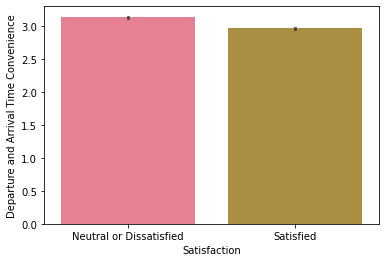

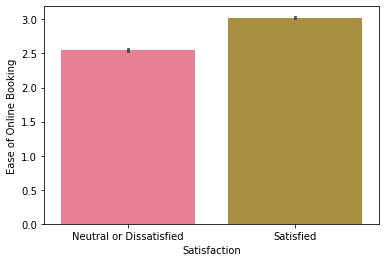

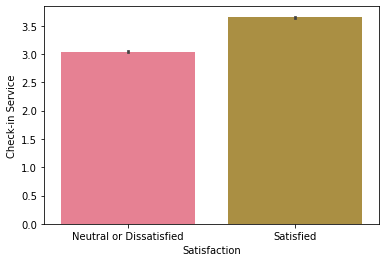

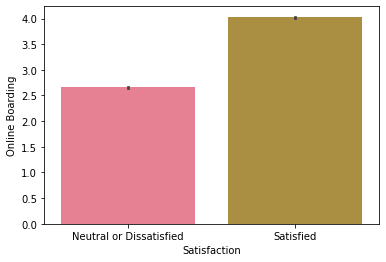

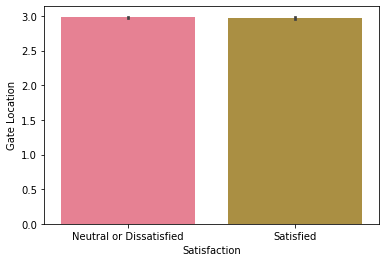

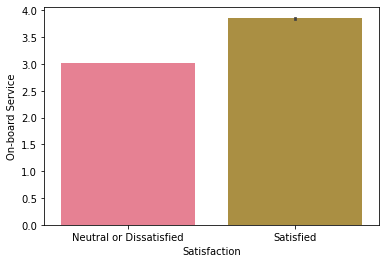

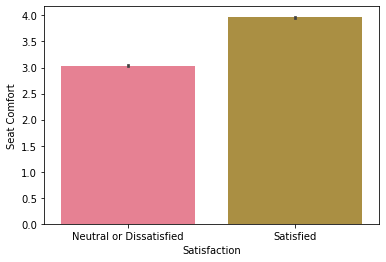

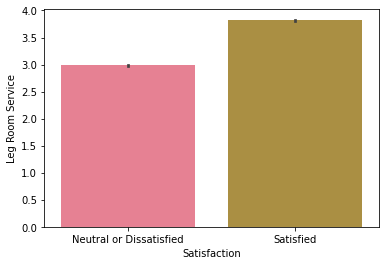

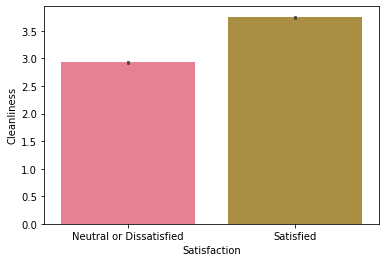

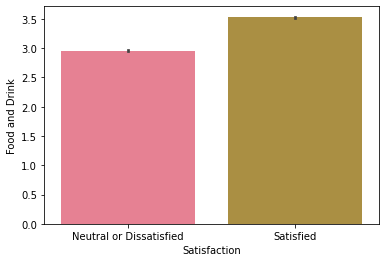

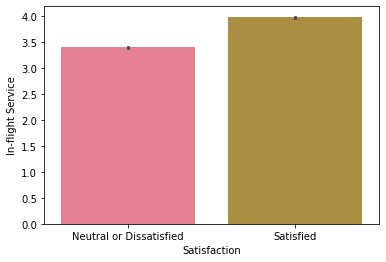

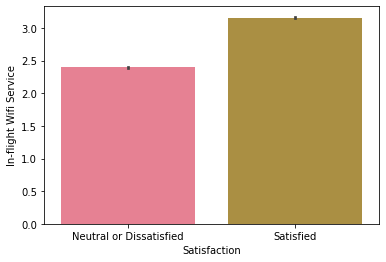

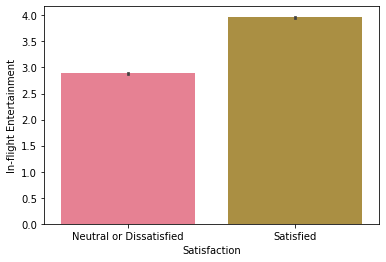

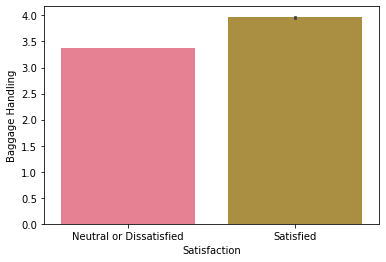

In [6]:
sns.set_palette("husl")
for col in data.columns:
    if data[col].dtype != 'object':
        sns.barplot(data=data, x="Satisfaction", y=col)  
        plt.show() 

<h3>Compare the staisfaction of the person based on his age:</h3>

In [7]:
data["Age"].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

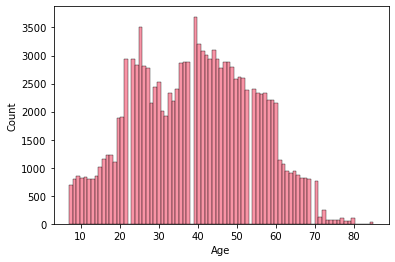

In [8]:
sns.set_palette("Set3")
sns.histplot(data=data, x="Age")

<h4>Young persons:</h4>

<AxesSubplot:xlabel='Satisfaction'>

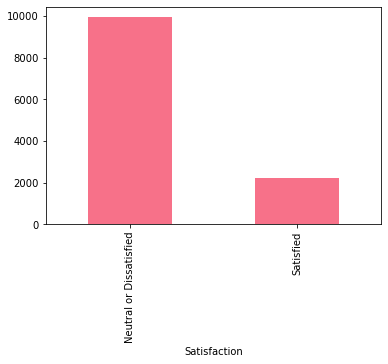

In [9]:
young_group = data[data["Age"] < 20].groupby(["Satisfaction"]).count()["ID"]
young_group.plot(kind="bar")

We deduce that the young persons are most likely to be unsatisfied.

<h4>Middle aged persons:</h4>

C:\Users\mirae\AppData\Local\Temp/ipykernel_21608/3688836052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  middle_group = data[(data["Age"] > 20)][(data["Age"] < 65)].groupby(["Satisfaction"]).count()["ID"]


<AxesSubplot:xlabel='Satisfaction'>

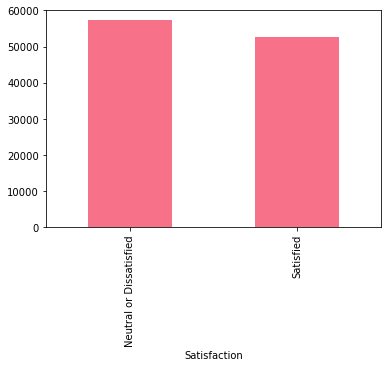

In [10]:
middle_group = data[(data["Age"] > 20)][(data["Age"] < 65)].groupby(["Satisfaction"]).count()["ID"]
middle_group.plot(kind="bar")

we deduce that the middle aged person satisfaction is not based on his age.

<h4>Old persons:</h4>

<AxesSubplot:xlabel='Satisfaction'>

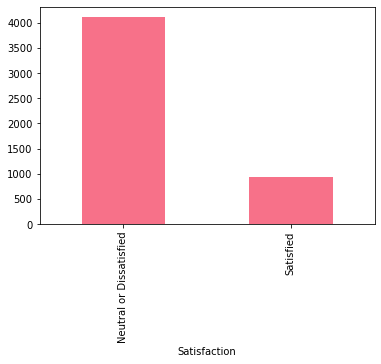

In [11]:
old_group = data[data["Age"] > 65].groupby(["Satisfaction"]).count()["ID"]
old_group.plot(kind="bar")

we deduce that the old persons are most likely to be unsatisfied.

<h2>Data Preprocessing</h2>

<h2>Identifying and handling the missing values:</h2>

In [12]:
data.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

<h2>Arrival Delay Column</h2>

<h3>Check the percentage of null in the column:</h3>

In [13]:
data["Arrival Delay"].isnull().sum()*100/data["Arrival Delay"].count()

0.30350537119556403

In [14]:
data["Arrival Delay"].value_counts()

0.0       72753
1.0        2747
2.0        2587
3.0        2442
4.0        2373
          ...  
1011.0        1
386.0         1
624.0         1
355.0         1
412.0         1
Name: Arrival Delay, Length: 472, dtype: int64

In [15]:
data["Arrival Delay"].describe()

count    129487.000000
mean         15.091129
std          38.465650
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay, dtype: float64

<h3>Plot the data before filling the null</h3>

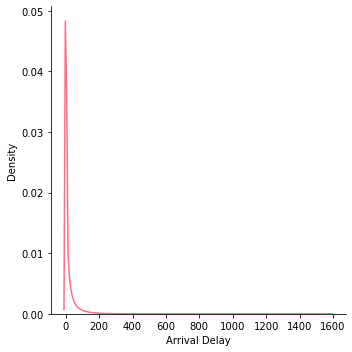

In [16]:
sns.set_palette("husl")
sns.displot(data=data, x="Arrival Delay", kind="kde")

<h3>Fill the null using the mean</h3>

In [17]:
data["Arrival Delay"] = data["Arrival Delay"].fillna(data["Arrival Delay"].mean())

<h3>Plot the data before filling the null</h3>

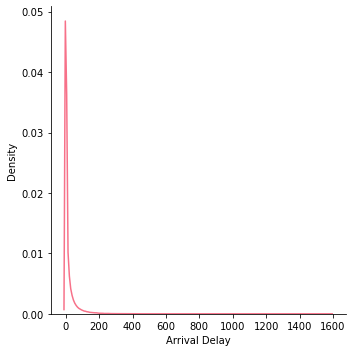

In [18]:
sns.displot(data=data, x="Arrival Delay", kind="kde")

<h2>Identifying and handling the outliers:</h2>

<h2>Flight Distance Column</h2>

<h4>Before removing the outliers</h4>

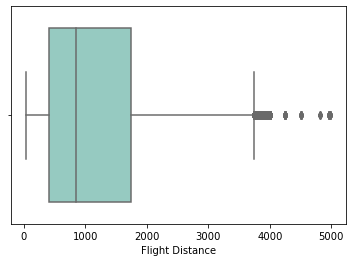

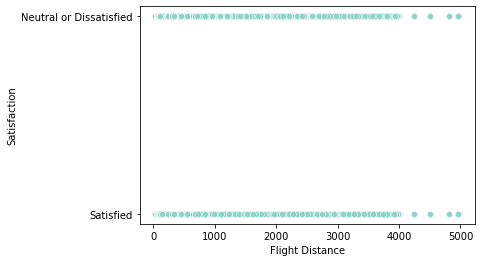

In [19]:
sns.set_palette("Set3")
bp = sns.boxplot(data = data, x = "Flight Distance")
plt.show()
sp = sns.scatterplot(data = data, x = "Flight Distance", y=data["Satisfaction"])
plt.show()

<h4>Use the IQR to remove the outliers</h4>

In [20]:
Q1_fd = data['Flight Distance'].quantile(0.25)
Q3_fd = data['Flight Distance'].quantile(0.75)
IQR_fd = Q3_fd - Q1_fd
#changed the default 1.5 to 1.8 because based on the scatter plot and the box plot not all the values greater than Q3_tr + 1.5*(IQR_tr) are outliers
UB_fd = Q3_fd + 1.8*(IQR_fd)
data.drop(data[data['Flight Distance']>UB_fd].index, axis = 0, inplace =True)

<h4>After removing the outliers</h4>

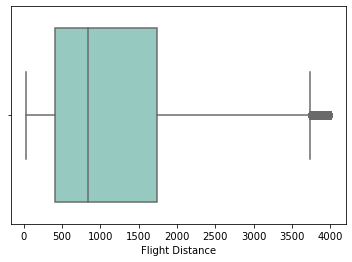

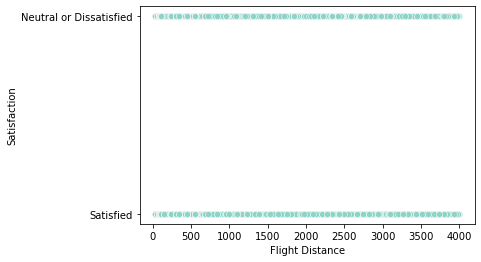

In [21]:
bp = sns.boxplot(data = data, x = "Flight Distance")
plt.show()
sp = sns.scatterplot(data = data, x = "Flight Distance", y=data["Satisfaction"])
plt.show()

<h3>Departure Delay Column:</h3>

<h4>Before removing the outliers</h4>

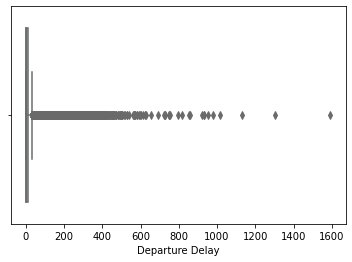

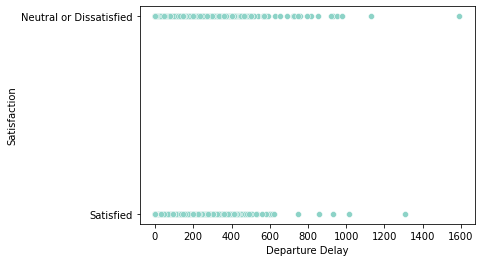

In [22]:
bp = sns.boxplot(data = data, x = "Departure Delay")
plt.show()
sp = sns.scatterplot(data = data, x = "Departure Delay", y=data["Satisfaction"])
plt.show()

In [23]:
data.drop(data[data['Departure Delay']>550].index, axis = 0, inplace =True)

<h4>After removing the outliers</h4>

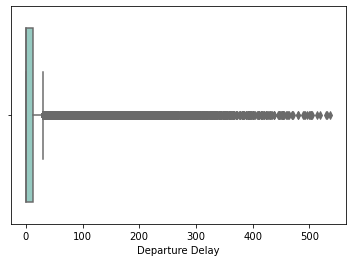

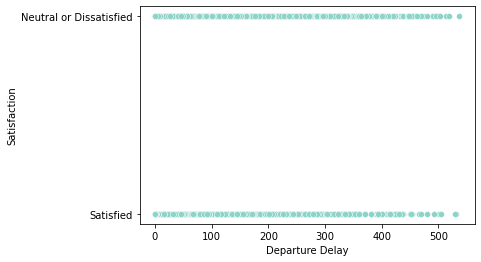

In [24]:
bp = sns.boxplot(data = data, x = "Departure Delay")
plt.show()
sp = sns.scatterplot(data = data, x = "Departure Delay", y=data["Satisfaction"])
plt.show()

<h2>Arrival Delay Column:</h2>

<h4>Before removing the outliers</h4>

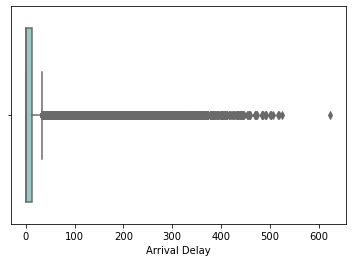

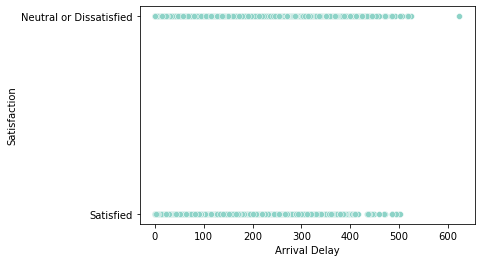

In [25]:
bp = sns.boxplot(data = data, x = "Arrival Delay")
plt.show()
sp = sns.scatterplot(data = data, x = "Arrival Delay", y=data["Satisfaction"])
plt.show()

In [26]:
data.drop(data[data['Arrival Delay']>500].index, axis = 0, inplace =True)

<h4>After removing the outliers</h4>

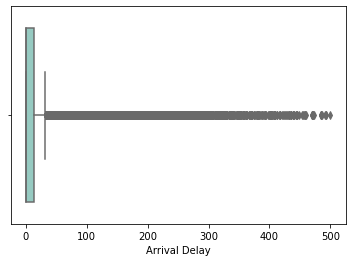

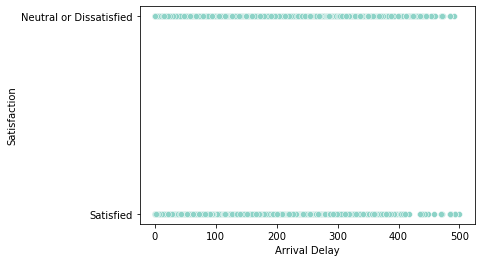

In [27]:
bp = sns.boxplot(data = data, x = "Arrival Delay")
plt.show()
sp = sns.scatterplot(data = data, x = "Arrival Delay", y=data["Satisfaction"])
plt.show()

<h2>Identifing and handeling imbalanced data:</h2>

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


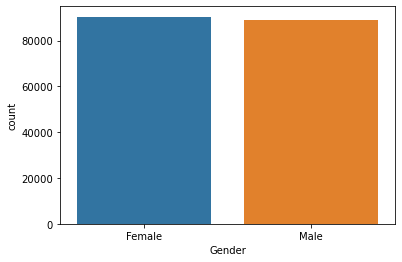

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


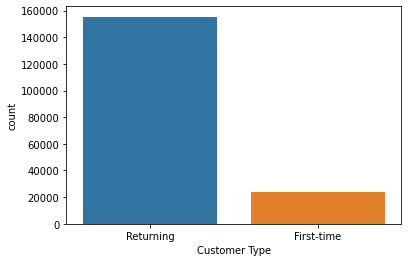

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


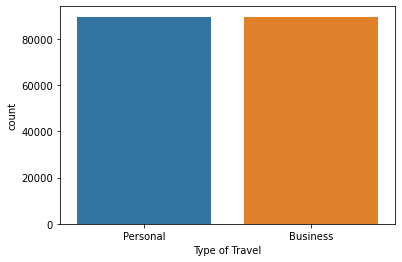

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


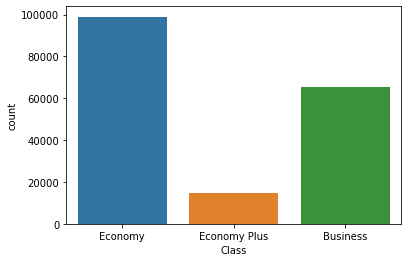

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


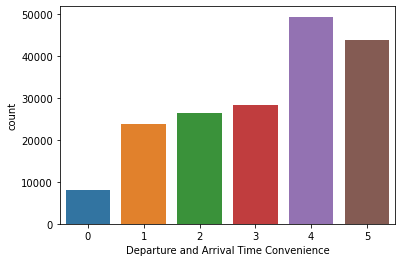

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


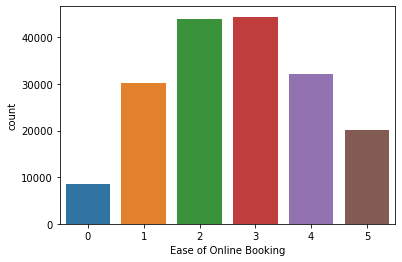

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


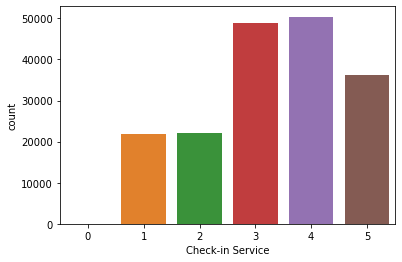

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


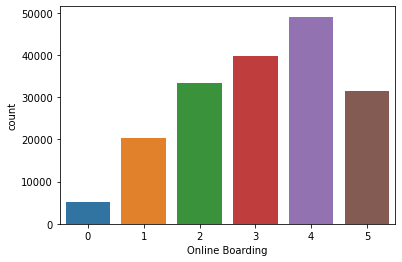

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


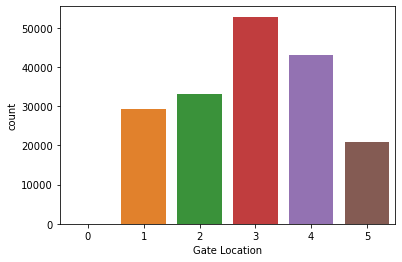

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


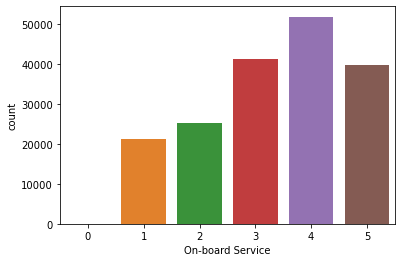

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


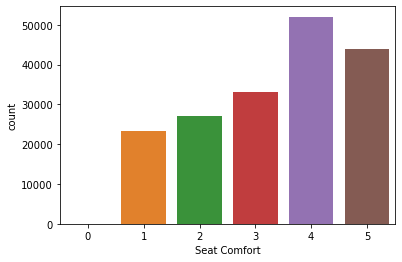

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


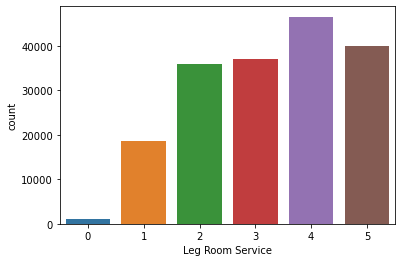

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


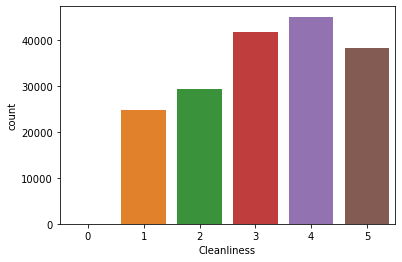

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


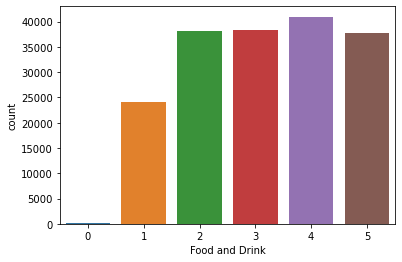

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


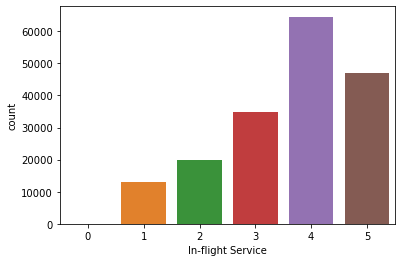

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


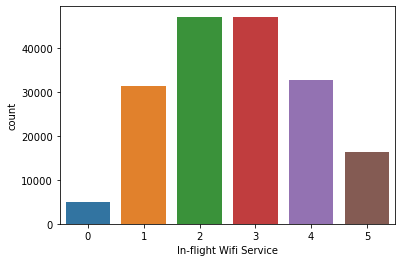

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


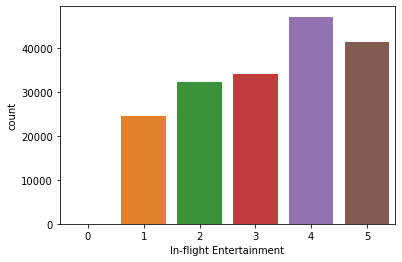

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


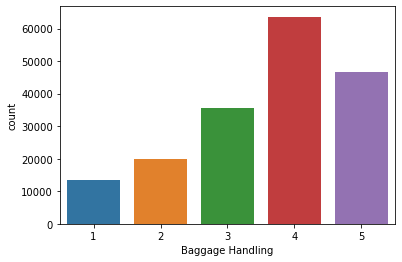

In [18]:
for col in ['Gender', 'Customer Type', 'Type of Travel', 'Class',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']:
    sns.countplot(data[col])
    plt.show()

<h3>Type of Travel Column:</h3>

In [15]:
data['Type of Travel'].value_counts()

Business    89693
Personal    40187
Name: Type of Travel, dtype: int64

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

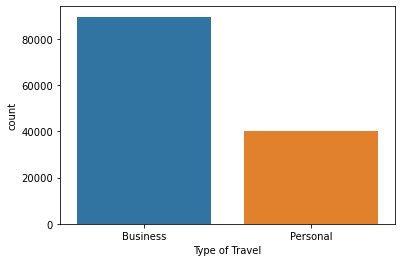

In [13]:
sns.countplot(data['Type of Travel'])

so we detect that the data in that column is unbalanced

<h3>Resample the data using upsampling to solve the imbalance data problem</h3>

In [16]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['Type of Travel']=="Business")] 
df_minority = data[(data['Type of Travel']=="Personal")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 89693, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data = pd.concat([df_minority_upsampled, df_majority])

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type of Travel', ylabel='count'>

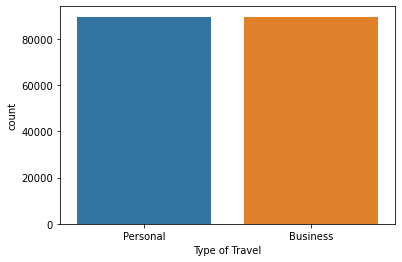

In [17]:
sns.countplot(data['Type of Travel'])

<h3>Customer type Column</h3>

In [19]:
data['Customer Type'].value_counts()

Returning     155394
First-time     23992
Name: Customer Type, dtype: int64

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Type', ylabel='count'>

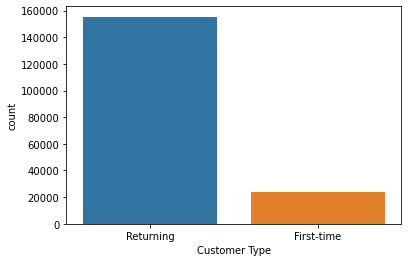

In [20]:
sns.countplot(data['Customer Type'])

so we detect that the data in that column is unbalanced

<h3>Resample the data using upsampling to solve the imbalance data problem</h3>

In [21]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['Customer Type']=="Returning")] 
df_minority = data[(data['Customer Type']=="First-time")] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 155394, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data = pd.concat([df_minority_upsampled, df_majority])

d:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer Type', ylabel='count'>

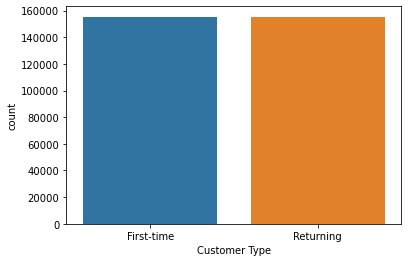

In [22]:
sns.countplot(data['Customer Type'])

<h2>Label Encoding</h2>

In [ ]:
data.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Customer Type"] = le.fit_transform(data["Customer Type"])
data["Type of Travel"] = le.fit_transform(data["Type of Travel"])
data["Class"] = le.fit_transform(data["Class"])
data["Satisfaction"] = le.fit_transform(data["Satisfaction"])

<h2>Split the data to Train and Test Data</h2>

In [ ]:
Y = data["Satisfaction"]
X = data.drop(["Satisfaction"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size= 0.20, random_state=42)

<h2>Perform Feature Scaling Using Robust Scaler</h2>

In [ ]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
X_Train = rs.fit_transform(X_Train)
X_Test = rs.fit_transform(X_Test)

<h2>Modeling:</h2>

<h2>Logistic Regression</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(X_Train , Y_Train)

LogisticRegression()

In [ ]:
lr.score(X_Train, Y_Train)

0.8757995530209618

In [ ]:
lr.score(X_Test, Y_Test)

0.8724232266019343

In [ ]:
Y_Pred1 = lr.predict(X_Test)
Y_Test_Pred = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred1})

In [ ]:
Y_Test_Pred = Y_Test_Pred.reset_index()

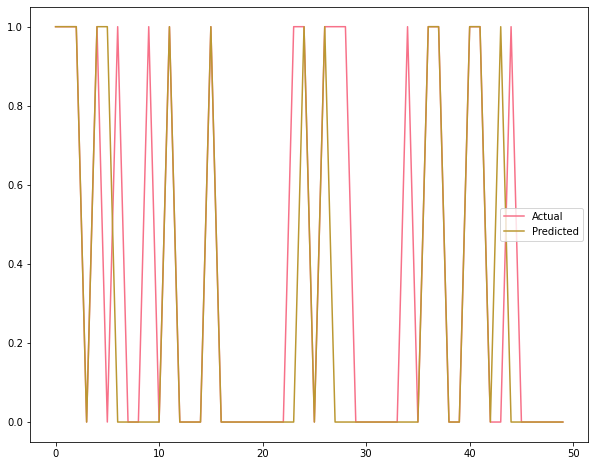

In [ ]:
sns.set_palette("husl")
plt.figure(figsize=(10, 8))
Y_Test_Pred = Y_Test_Pred.drop(["index"], axis=1)
plt.plot(Y_Test_Pred[:50])
plt.legend(["Actual", "Predicted"])

<h2>KNN</h2>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.fit(X_Train , Y_Train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(X_Train , Y_Train)

KeyboardInterrupt: 

In [ ]:
knn.score(X_Test, Y_Test)

0.922783493237776

In [ ]:
Y_Pred2 = knn.predict(X_Test)
Y_Test_Pred2 = pd.DataFrame({"Y_Test": Y_Test, "Y_Pred": Y_Pred2})

In [ ]:
Y_Test_Pred2 = Y_Test_Pred2.reset_index()

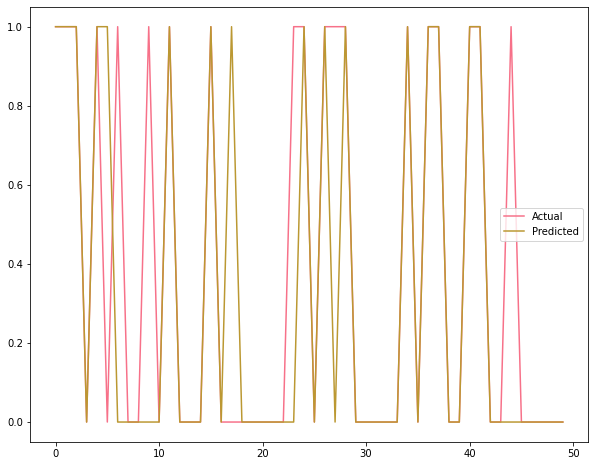

In [ ]:
plt.figure(figsize=(10, 8))
Y_Test_Pred2 = Y_Test_Pred2.drop(["index"], axis=1)
plt.plot(Y_Test_Pred2[:50])
plt.legend(["Actual", "Predicted"])

<h2>Decision Tree:</h2>

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
dt =DecisionTreeClassifier(max_features = 6, max_depth = 4)
dt.fit(X_Train , Y_Train)

DecisionTreeClassifier(max_depth=4, max_features=6)

In [ ]:
dt.score(X_Train , Y_Train)

0.8700485511713933

In [ ]:
dt.score(X_Test , Y_Test)

0.8681462644010326

[Text(418.5, 587.0880000000001, 'X[5] <= -0.5\ngini = 0.491\nsamples = 103808\nvalue = [58706, 45102]'),
 Text(209.25, 456.624, 'X[12] <= 0.25\ngini = 0.424\nsamples = 49675\nvalue = [15145, 34530]'),
 Text(104.625, 326.1600000000001, 'X[21] <= -0.25\ngini = 0.429\nsamples = 16233\nvalue = [11166, 5067]'),
 Text(52.3125, 195.69600000000003, 'X[9] <= -1.25\ngini = 0.279\nsamples = 10136\nvalue = [8436, 1700]'),
 Text(26.15625, 65.23200000000008, 'gini = 0.494\nsamples = 544\nvalue = [242, 302]'),
 Text(78.46875, 65.23200000000008, 'gini = 0.249\nsamples = 9592\nvalue = [8194, 1398]'),
 Text(156.9375, 195.69600000000003, 'X[2] <= -0.312\ngini = 0.495\nsamples = 6097\nvalue = [2730, 3367]'),
 Text(130.78125, 65.23200000000008, 'gini = 0.361\nsamples = 1304\nvalue = [996, 308]'),
 Text(183.09375, 65.23200000000008, 'gini = 0.462\nsamples = 4793\nvalue = [1734, 3059]'),
 Text(313.875, 326.1600000000001, 'X[19] <= -0.25\ngini = 0.21\nsamples = 33442\nvalue = [3979, 29463]'),
 Text(261.5625, 

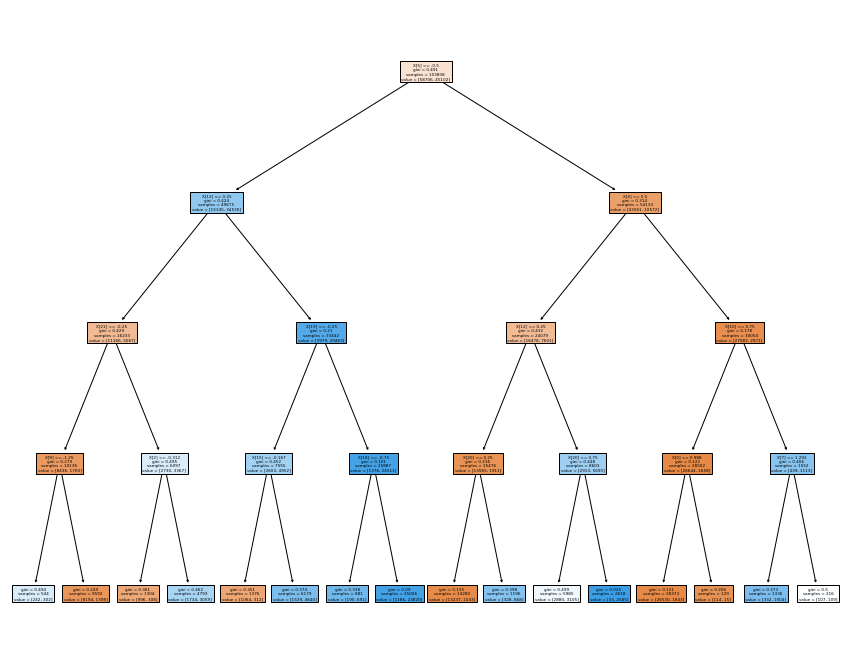

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
tree.plot_tree(dt , filled=True)

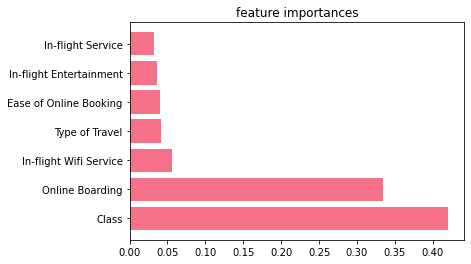

In [ ]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()

features_names = data.drop(["Satisfaction"], axis=1).columns

f_importances(abs(dt.feature_importances_), features_names, top=7)

<h2>Random Forest:</h2>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features = 5, max_depth = 4)
rf.fit(X_Train , Y_Train)
rf.score(X_Train , Y_Train)

0.915526741676942

In [ ]:
rf.score(X_Test , Y_Test)

0.9137286633529842

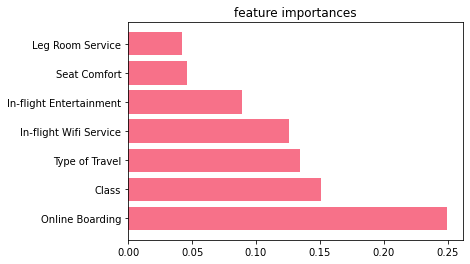

In [ ]:
f_importances(abs(rf.feature_importances_), features_names, top=7)